<a href="https://colab.research.google.com/github/franciscourbina/Proyecto_grupo12a_IA/blob/main/seg_miocardio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as  np
import matplotlib.pyplot as plt
import tensorflow as tf
import os 
import random
import gc 


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

path='/content/drive/MyDrive/Seg_miocardio/dataset/'

Mounted at /content/drive


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
### Cargar mis datos, pasando los archivos de unint8 a float64.

X_train=np.float64(np.load(path+'train_imgs.npy'))[:,:,:,np.newaxis]
Y_train=np.float64(np.load(path+'train_annot.npy',))[:,:,:,np.newaxis]

X_val=np.float64(np.load(path+'val_imgs.npy'))[:,:,:,np.newaxis]
Y_val=np.float64(np.load(path+'val_annot.npy',))[:,:,:,np.newaxis]

X_test=np.float64(np.load(path+'test_imgs.npy'))[:,:,:,np.newaxis]
Y_test=np.float64(np.load(path+'test_annot.npy',))[:,:,:,np.newaxis]


In [ ]:
## Reemplazo los 2 por un 0
Y_train=np.where(Y_train==2, 0, Y_train)
Y_val=np.where(Y_val==2, 0, Y_val)
Y_test=np.where(Y_test==2, 0, Y_test)


In [ ]:
gc.collect()

349

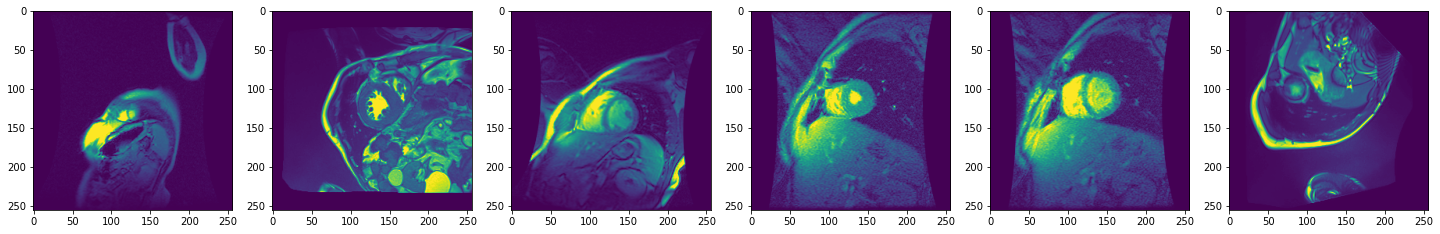

In [ ]:
# Visualizacion de algunas imagenes de los datos de entrenamiento

chosen_idx = np.random.choice(X_train.shape[0], size=6, replace=False)

fig, ax = plt.subplots(1, 6, figsize=(25,25))
fig.set_facecolor('white')

for i, idx in enumerate(chosen_idx):
    image = X_train[idx,:,:,0]
    ax[i].imshow(image)
    # ax[i].axis('off')

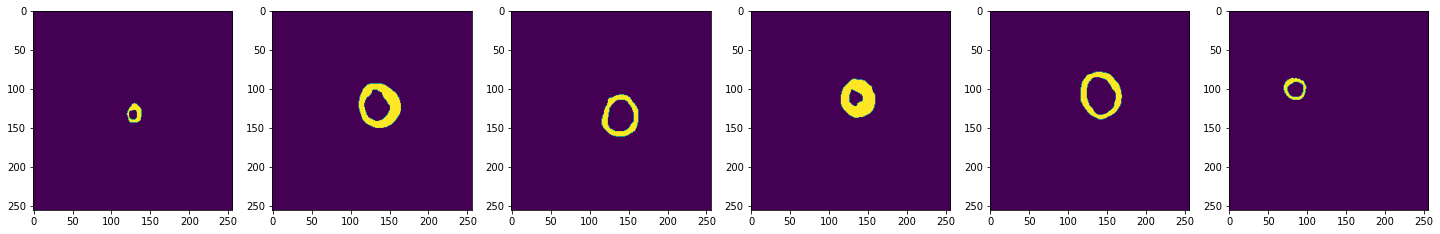

In [ ]:
fig, ax = plt.subplots(1, 6, figsize=(25,25))
fig.set_facecolor('white')

for i, idx in enumerate(chosen_idx):
    image_2 = Y_train[idx,:,:,0]
    ax[i].imshow(image_2)

In [ ]:
gc.collect()

88

In [ ]:
np.random.seed = 1234


IMG_WIDTH=256
IMG_HEIGHT=256
IMG_CHANNELS=1




#Construcción del modelo

##Kernel_initializare son los pesos iniciales, los valores iniciales simplemente
# puede ser statical normal distribucion
# he_normal distribucion normal truncada centrada en 0

inputs= tf.keras.layers.Input((IMG_WIDTH,IMG_HEIGHT,IMG_CHANNELS))
# s=tf.keras.layers.Lambda(lambda x: x/255) (inputs) ## convierte los inputs de integrer a floating-point dividiendo cada pixel por 255

conv1=tf.keras.layers.Conv2D(16,(3,3),activation='relu', kernel_initializer='he_normal', padding='same') (inputs)
conv1=tf.keras.layers.Dropout(0.1)(conv1)
conv1=tf.keras.layers.Conv2D(16,(3,3),activation='relu', kernel_initializer='he_normal', padding='same') (conv1)
pool1=tf.keras.layers.MaxPool2D((2,2))(conv1)


conv2=tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_normal', padding='same') (pool1)
conv2=tf.keras.layers.Dropout(0.1)(conv2)
conv2=tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_normal', padding='same') (conv2)
pool2=tf.keras.layers.MaxPool2D((2,2))(conv2)

conv3=tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_normal', padding='same') (pool2)
conv3=tf.keras.layers.Dropout(0.2)(conv3)
conv3=tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_normal', padding='same') (conv3)
pool3=tf.keras.layers.MaxPool2D((2,2))(conv3)


conv4=tf.keras.layers.Conv2D(128,(3,3),activation='relu', kernel_initializer='he_normal', padding='same') (pool3)
conv4=tf.keras.layers.Dropout(0.2)(conv4)
conv4=tf.keras.layers.Conv2D(128,(3,3),activation='relu', kernel_initializer='he_normal', padding='same') (conv4)
pool4=tf.keras.layers.MaxPool2D(pool_size=(2,2))(conv4)



conv5=tf.keras.layers.Conv2D(256,(3,3),activation='relu', kernel_initializer='he_normal', padding='same') (pool4)
conv5=tf.keras.layers.Dropout(0.3)(conv5)
conv5=tf.keras.layers.Conv2D(256,(3,3),activation='relu', kernel_initializer='he_normal', padding='same') (conv5)



#Decoder
up6=tf.keras.layers.Conv2DTranspose(128,(2,2),strides=(2,2),padding='same')(conv5)
up6=tf.keras.layers.concatenate([up6,conv4])
conv6=tf.keras.layers.Conv2D(128,(3,3),activation='relu', kernel_initializer='he_normal', padding='same') (up6)
conv6=tf.keras.layers.Dropout(0.2)(conv6)
conv6=tf.keras.layers.Conv2D(128,(3,3),activation='relu', kernel_initializer='he_normal', padding='same') (conv6)

up7=tf.keras.layers.Conv2DTranspose(64,(2,2),strides=(2,2),padding='same')(conv6)
up7=tf.keras.layers.concatenate([up7,conv3])
conv7=tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_normal', padding='same') (up7)
conv7=tf.keras.layers.Dropout(0.2)(conv7)
conv7=tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_normal', padding='same') (conv7)

up8=tf.keras.layers.Conv2DTranspose(32,(2,2),strides=(2,2),padding='same')(conv7)
up8=tf.keras.layers.concatenate([up8,conv2])
conv8=tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_normal', padding='same') (up8)
conv8=tf.keras.layers.Dropout(0.1)(conv8)
conv8=tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_normal', padding='same') (conv8)



up9=tf.keras.layers.Conv2DTranspose(16,(2,2),strides=(2,2),padding='same')(conv8)
up9=tf.keras.layers.concatenate([up9,conv1],axis=3)
conv9=tf.keras.layers.Conv2D(16,(3,3),activation='relu', kernel_initializer='he_normal', padding='same') (up9)
conv9=tf.keras.layers.Dropout(0.1)(conv9)
conv9=tf.keras.layers.Conv2D(16,(3,3),activation='relu', kernel_initializer='he_normal', padding='same') (conv9)

outputs=tf.keras.layers.Conv2D(1,(1,1),activation='sigmoid') (conv9)

model=tf.keras.Model(inputs=[inputs],outputs=[outputs])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()





Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 256, 256, 16) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 2320        dropout[0][0]                    
______________________________________________________________________________________________

In [ ]:
gc.collect()


88

In [ ]:
##ModelCheckpoint
# checkpointer= tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5',verbose=1,save_best_only=True)

backs=[tf.keras.callbacks.EarlyStopping(patience=10,monitor='val_loss')]

results= model.fit(X_train,Y_train, validation_data=(X_val,Y_val), batch_size=8,epochs=100,callbacks=backs)

Epoch 1/100
571/571 [==============================] - 149s 201ms/step - loss: 0.1080 - accuracy: 0.9859 - val_loss: 0.0377 - val_accuracy: 0.9881
Epoch 2/100
571/571 [==============================] - 111s 194ms/step - loss: 0.0219 - accuracy: 0.9899 - val_loss: 0.0221 - val_accuracy: 0.9917
Epoch 3/100
571/571 [==============================] - 111s 194ms/step - loss: 0.0140 - accuracy: 0.9943 - val_loss: 0.0203 - val_accuracy: 0.9922
Epoch 4/100
571/571 [==============================] - 111s 194ms/step - loss: 0.0110 - accuracy: 0.9956 - val_loss: 0.0161 - val_accuracy: 0.9939
Epoch 5/100
571/571 [==============================] - 110s 193ms/step - loss: 0.0086 - accuracy: 0.9964 - val_loss: 0.0125 - val_accuracy: 0.9951
Epoch 6/100
571/571 [==============================] - 110s 193ms/step - loss: 0.0078 - accuracy: 0.9968 - val_loss: 0.0118 - val_accuracy: 0.9956
Epoch 7/100
571/571 [==============================] - 110s 193ms/step - loss: 0.0071 - accuracy: 0.9970 - val_loss: 0

In [ ]:
gc.collect()
!mkdir -p saved_model
model.save(path+'/saved_model/my_model_2')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Seg_miocardio/dataset//saved_model/my_model_2/assets


In [ ]:
# gc}.collect()
results.history

{'accuracy': [0.985924243927002,
  0.9899322390556335,
  0.9942778944969177,
  0.9955704808235168,
  0.9964459538459778,
  0.9967877864837646,
  0.997035562992096,
  0.9971232414245605,
  0.9944789409637451,
  0.9970660209655762,
  0.9973272681236267,
  0.9974583387374878,
  0.9975622296333313,
  0.9975900650024414,
  0.9976041913032532,
  0.9976106882095337,
  0.9971174001693726,
  0.9976062178611755,
  0.9977736473083496,
  0.9978340864181519,
  0.9971673488616943,
  0.9976733922958374,
  0.9978546500205994,
  0.9979112148284912,
  0.9979034066200256,
  0.9978060722351074,
  0.997937023639679,
  0.9979296326637268,
  0.9974797368049622,
  0.997803807258606],
 'loss': [0.107986219227314,
  0.021871136501431465,
  0.013958924449980259,
  0.011012130416929722,
  0.00860543828457594,
  0.007757955696433783,
  0.007131644990295172,
  0.006957099307328463,
  0.015012192539870739,
  0.007042317185550928,
  0.006378995254635811,
  0.006041255779564381,
  0.005788514390587807,
  0.00573593936

(0.0, 30.0)

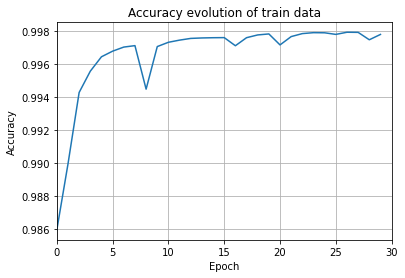

In [ ]:
plt.plot(results.history['accuracy'])
plt.grid()
plt.title('Accuracy evolution of train data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0,30])

(0.0, 30.0)

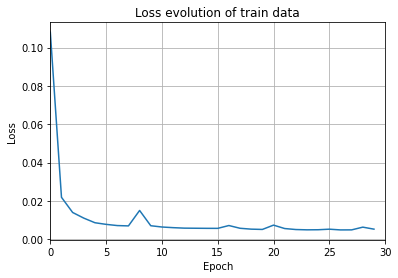

In [ ]:
plt.plot(results.history['loss'])
plt.grid()
plt.title('Loss evolution of train data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim([0,30])


(0.0, 30.0)

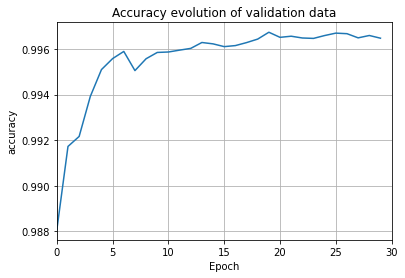

In [ ]:
plt.plot(results.history['val_accuracy'])
plt.grid()
plt.title('Accuracy evolution of validation data')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.xlim([0,30])

(0.0, 30.0)

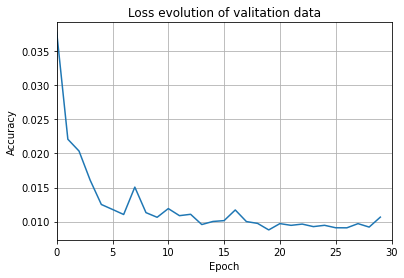

In [ ]:
plt.plot(results.history['val_loss'])
plt.grid()
plt.title('Loss evolution of valitation data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0,30])


In [ ]:
my_model = tf.keras.models.load_model(path+'saved_model/my_model_2')


In [ ]:


preds_train = my_model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = my_model.predict(X_val[int(X_val.shape[0]*0.9):], verbose=1)
preds_test = my_model.predict(X_test, verbose=1)

 
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)



39/39 [==============================] - 173s 4s/step


In [ ]:
gc.collect()

2609

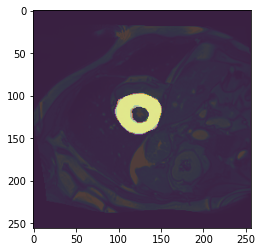

In [ ]:
gc.collect()
# Se muestra el resultado de alguna predicción sobre una imagen de test.
# ix = random.randint(0, len(preds_train_t))
ix =35
plt.imshow(X_train[ix,:,:,0],alpha=0.5)
plt.imshow(np.squeeze(Y_train[ix,:,:,0]),alpha=0.5)
img_pred_tmp = np.squeeze(preds_train_t[ix,:,:,0])
plt.imshow(img_pred_tmp, alpha=0.5, cmap='inferno')
plt.show()



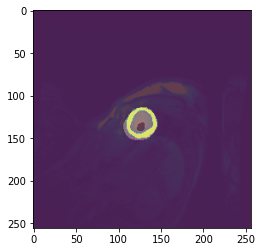

In [ ]:
# Se repite lo anterior en el conjunto de validación
# ix = random.randint(0, len(preds_val_t))
plt.imshow(X_val[int(X_val.shape[0]*0.9):][ix,:,:,0],alpha=0.5)
img_pred_tmp=np.squeeze(Y_val[int(Y_val.shape[0]*0.9):][ix,:,:,0])
plt.imshow(img_pred_tmp, alpha=0.5, cmap='inferno')


plt.imshow(np.squeeze(preds_val_t[ix,:,:,0]),alpha=0.5)
plt.show()

In [ ]:
gc.collect()


35036

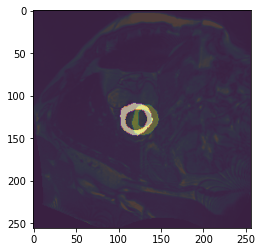

In [ ]:
# Ahora con una imagen del conjunto de test.
ix = random.randint(0, len(preds_val_t))
plt.imshow(X_test[ix,:,:,0],alpha=0.5)
plt.imshow(np.squeeze(Y_test[int(Y_test.shape[0]*0.9):][ix,:,:,0]),alpha=0.5)
plt.imshow(np.squeeze(preds_test_t[ix,:,:,0]),alpha=0.5,cmap='inferno')
plt.show()